In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('haberman.csv')

In [4]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
df.shape

(306, 4)

In [6]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [8]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [9]:
l=[]
for ele in df['status']:
  if(ele == 1):
    l.append(0)
  else:
    l.append(1)

In [10]:
df['updated_status']=l

**Objective**



where a patient survived for more than 5 years or  not

In [11]:
df.head()

,age,year,nodes,status,updated_status
0,30,64,1,1,0
1,30,62,3,1,0
2,30,65,0,1,0
3,31,59,2,1,0
4,31,65,4,1,0


In [12]:
df['updated_status'].value_counts()

0    225
1     81
Name: updated_status, dtype: int64

In [13]:
df.drop(columns=['status'],axis=1)

,age,year,nodes,updated_status
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0
...,...,...,...,...
301,75,62,1,0
302,76,67,0,0
303,77,65,3,0
304,78,65,1,1


 ** 26.4 % is number 1 **


** 73.5 % is number 0 **

clearly it was a imbalanced dataset


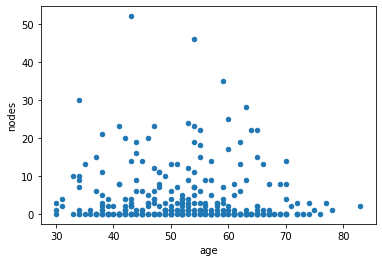

In [14]:
df.plot(kind='scatter',x='age',y='nodes')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


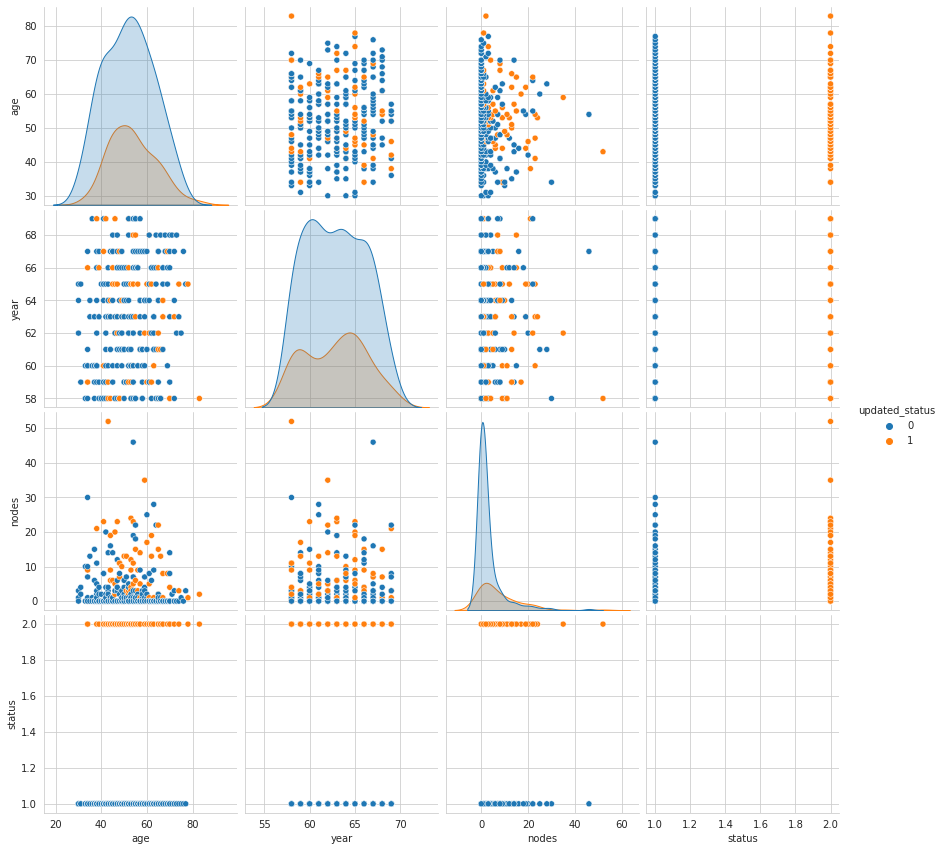

In [15]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="updated_status", size=3);
plt.show()

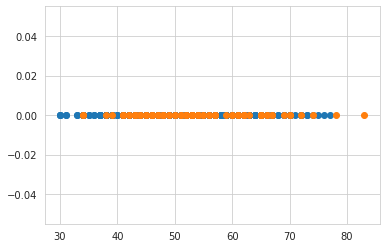

In [16]:
one=df.loc[df['updated_status']== 0]
zero=df.loc[df['updated_status']==1]
plt.plot(one['age'],np.zeros_like(one['age']),'o')
plt.plot(zero['age'],np.zeros_like(zero['age']),'o')
plt.show()

This seem like orange points (zero) are dominating 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


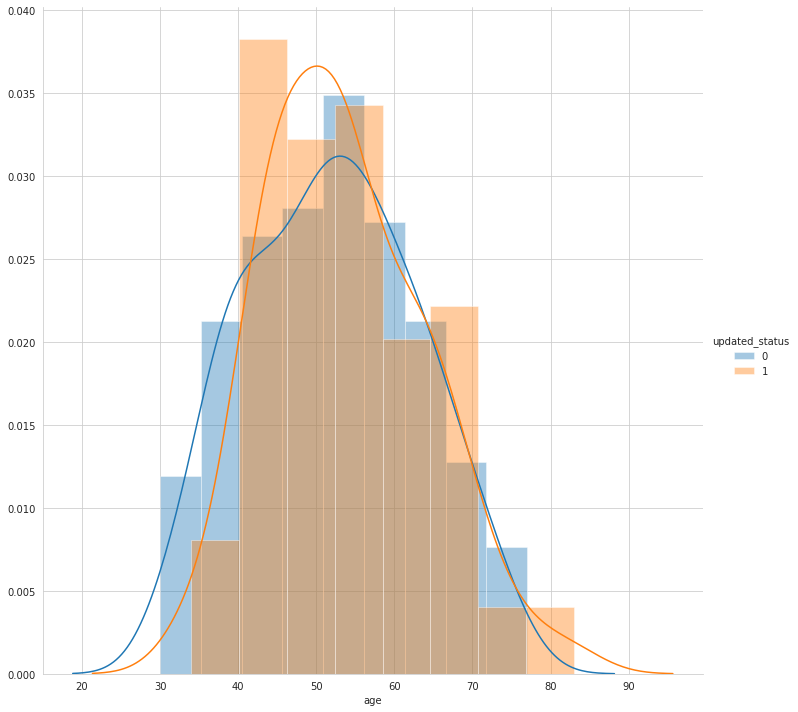

In [17]:
sns.FacetGrid(df,hue='updated_status',size=10).map(sns.distplot, "age").add_legend();
plt.show();

Age (30-33) are sustained over 5 year 


In [18]:
df[df['age']<=33]

,age,year,nodes,status,updated_status
0,30,64,1,1,0
1,30,62,3,1,0
2,30,65,0,1,0
3,31,59,2,1,0
4,31,65,4,1,0
5,33,58,10,1,0
6,33,60,0,1,0


when the age is less than 33 he has survived more than 5 yeara

In [19]:
df[df['age']<=34]

,age,year,nodes,status,updated_status
0,30,64,1,1,0
1,30,62,3,1,0
2,30,65,0,1,0
3,31,59,2,1,0
4,31,65,4,1,0
5,33,58,10,1,0
6,33,60,0,1,0
7,34,59,0,2,1
8,34,66,9,2,1
9,34,58,30,1,0


there are 2 women who were died at age of 34(see rows 7 and 8)

In [20]:
max(df['age'])

83

In [21]:
df[df['age']>=78]

,age,year,nodes,status,updated_status
304,78,65,1,2,1
305,83,58,2,2,1


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


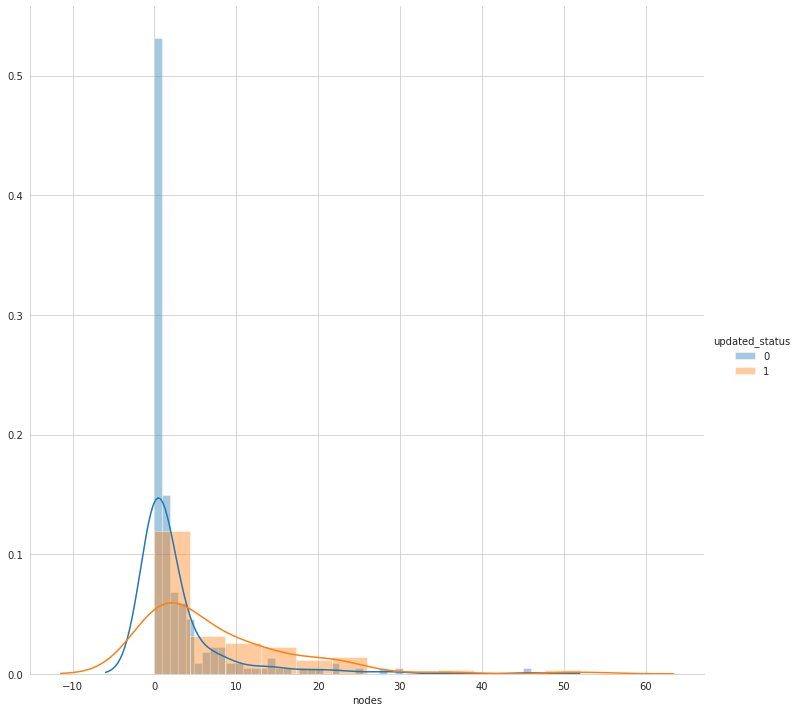

In [22]:
sns.FacetGrid(df,hue='updated_status',size=10).map(sns.distplot, "nodes").add_legend();
plt.show();

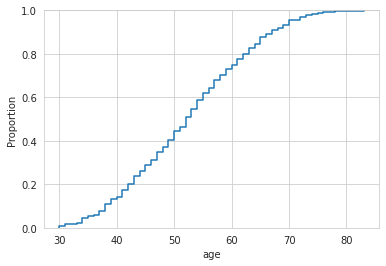

In [23]:
#cdf
sns.ecdfplot(data=df, x="age")

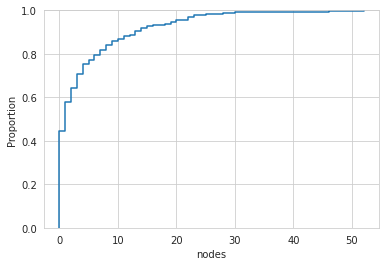

In [24]:
sns.ecdfplot(data=df, x="nodes")

there are 0 nodes with proportion of 50 %(apporx)

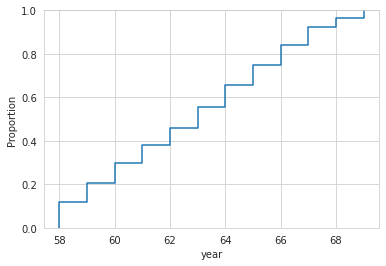

In [25]:
sns.ecdfplot(data=df, x="year")

year of admiting increases linearly

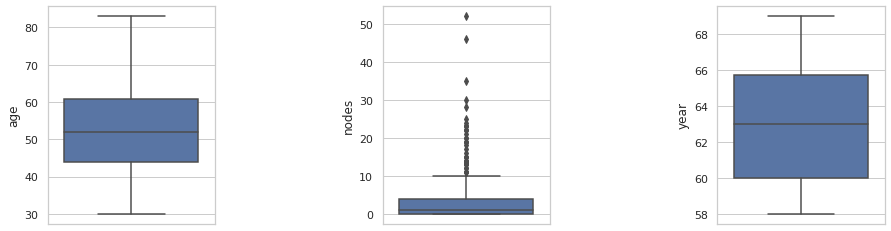

In [26]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.boxplot(y=df['age'])
plt.subplot(1,3,2)
sns.boxplot(y=df['nodes'])
plt.subplot(1,3,3)
sns.boxplot(y=df['year'])

plt.subplots_adjust(wspace=1)



majority of age is 45 to 62




number of nodes in majority  is less than 10





year of 60 to 66 where maximum patients admitted

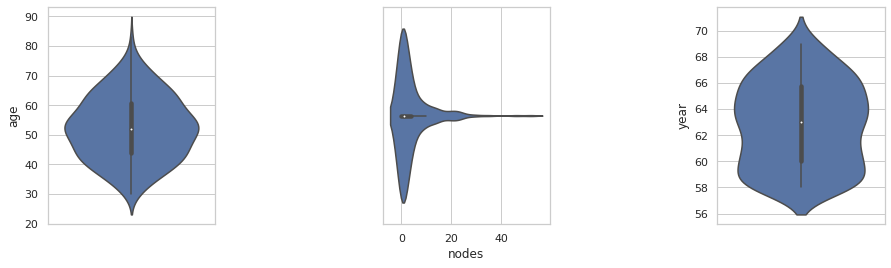

In [27]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.violinplot(y=df['age'])
plt.subplot(1,3,2)
sns.violinplot(x=df['nodes'])
plt.subplot(1,3,3)
sns.violinplot(y=df['year'])

plt.subplots_adjust(wspace=1)

clearly in volin plot we see 

the nodes in majority is less than 10

from year 1958 to 1966 where majority of patients admited

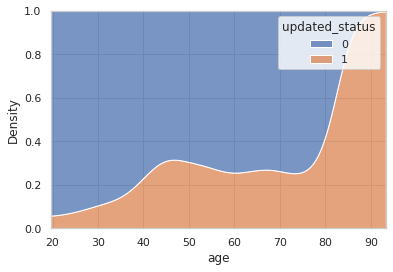

In [29]:
sns.kdeplot(data=df,x='age',hue='updated_status',multiple="fill")

this plot gives nice visual idea of people of survival status



above 80 the survival status is very low

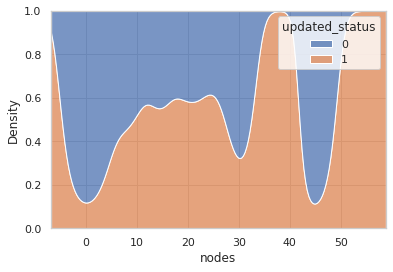

In [30]:
sns.kdeplot(data=df,x='nodes',hue='updated_status',multiple="fill")

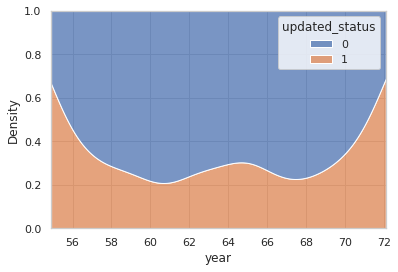

In [31]:
sns.kdeplot(data=df,x='year',hue='updated_status',multiple="fill")

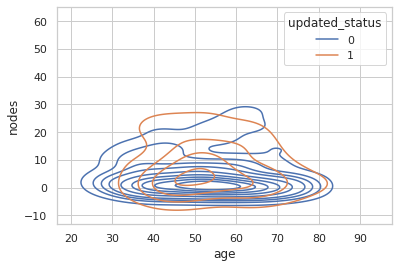

In [35]:
sns.kdeplot(data=df, x="age", y="nodes", hue="updated_status")

**Over all it is mix of imbalance data
where it is difficult to find which is important
in my view age and nodes are important to find survival status of a person**